Numerical tensor elements can be interpreted as coordinates in a (often very high dimensional) real space

We have completed our overview of tensors and their operations. Time to step back a little and think what the layer does in broader terms - we know it implements an activation function of w dot x plus b - but what does that mean, really?

A helpful insight is that tensor elements can be interpreted as coordinates of a high dimensional geometric object. 

In [1]:
import numpy as np
a = np.array([1, -1])
b = np.array([1, 1])
c = np.array([-1, 1])
d = np.array([-1, -1])
x = np.array([a, b, c, d])
print(x, '\t', x.shape)

[[ 1 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]] 	 (4, 2)


We will consider a layer transformation of a low dimensional object - a tensor holding four 2D points

Each point is a corner of a square. 

We will consider a layer transformation of a low dimensional object - a tensor holding four 2D points. Each point is a corner of a square.  

In [2]:
import matplotlib.pyplot as plt
def plot_poly(a, b, col):
    axes = plt.gca()
    axes.axis('equal')
    plt.plot(a, b, 'ro')
    plt.plot(a, b, color=col, linestyle = '-')
    plt.plot([a[-1], a[0]], [b[-1], b[0]], color=col, linestyle = '-')

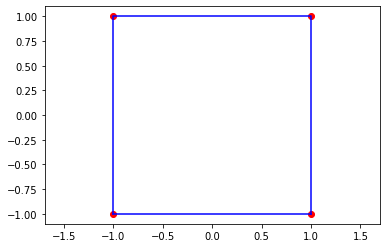

In [4]:
plot_poly(x[:, 0], x[:, 1], 'b')
plt.show()

Four data points forming a square.

A function is linear if
1. $f(x + y) = f(x) + f(y)$
2. $f(ax) = af(x)$

Otherwise it is nonlinear

We have mentioned 'linearity' a few times. Here is the definition of a linear function. A function is linear if $f(x + y) = f(x) + f(y)$ and $f(ax) = af(x)$ for scalar $a$ and vectors $x, y$

$w \cdot x$ is a linear transformation

$w \cdot x$ is a linear transformation.

For example, a rotation 

\begin{align*}
w\cdot x = \begin{pmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
=
\begin{pmatrix} x_1 \cos \theta - x_2 \sin \theta \\ x_1 \sin \theta + y_2 \cos \theta \end{pmatrix}
\end{align*}

For example, $w \cdot x$ is a linear function if $w$ is a rotation matrix. Rotations are linear: a rotation by 60 degrees and then by 30 degrees is the same as a single rotation by 60 + 30 = 90 degrees, and a rotation by 3 times 30 degrees is the same as three rotations of thirty degrees each.

In [3]:
theta = 1
w = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

y = np.zeros([4, 2])
for i in range(len(x)):
    y[i] = np.dot(w, x[i])

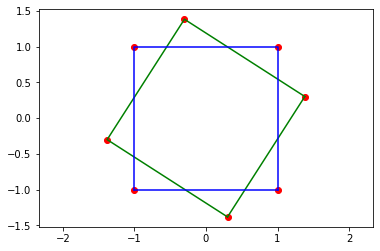

In [5]:
plot_poly(y[:, 0], y[:, 1], 'g')
plot_poly(x[:, 0], x[:, 1], 'b')
plt.show()

The blue square has been rotated by 1 radian.

$w \cdot x + b$ implements an affine transformation (for nonzero $b$) -  a linear transformation followed by a translation

$w \cdot x + b$ is not linear (unless b is zero). $w \cdot x + b$ is an 'affine' transformation -  a linear transformation followed by a translation.

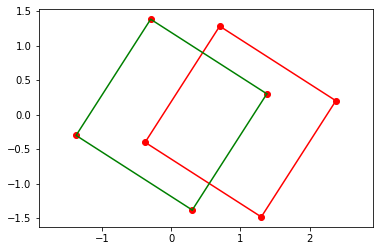

In [6]:
b = np.array([1, -0.1])
z = np.add(y, b)

plot_poly(z[:, 0], z[:, 1], 'red')
plot_poly(y[:, 0], y[:, 1], 'g')
plt.show()

The rotated square is translated by one unit to the right and by one tenth of a unit downwards.

Element-wise application of a nonlinear function to $w \cdot x + b$ will introduce distortions

Element-wise application of a nonlinear function to $w \cdot x + b$ introduces *distortions*.

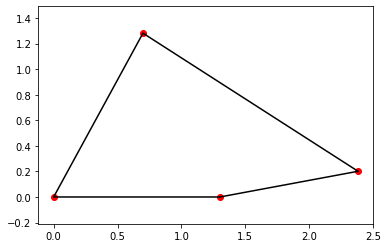

In [7]:
def relu(x):
    assert len(x.shape) == 2
    y = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            y[i, j] = max(x[i, j], 0.)
    return y

w = relu(z)

plot_poly(w[:, 0], w[:, 1], 'black')
plt.show()

`relu` is applied to the corners of the rotated and translated square.

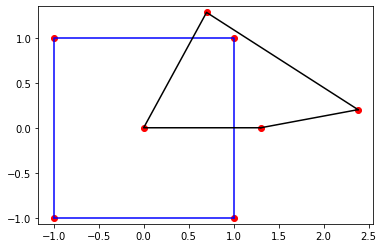

In [8]:
plot_poly(x[:, 0], x[:, 1], 'b')
plot_poly(w[:, 0], w[:, 1], 'black')
plt.show()

Before and after. 

Each layer in a neural network performs a non-linear data transformation - $f(w\cdot x + b)$ - where $f$ is the activation function and $w \cdot x + b$ is an affine transformation

The network as a whole, in a series of activations and affine transformations implements a complex transformation on a high dimensional geometric object (the data)

To summarise: each layer in a neural network performs a non-linear data transformation - $f(w\cdot x + b)$ - where $f$ is a non-linear activation function and $w \cdot x + b$ is an affine transformation.

The network as a whole, in as series of activations and affine transformations implements a complex transformation on a high dimensional geometric object (the data).

The complexity of the overall function of the network is composed of a series of simpler non-linear transformations

The network unfolds complex data into something simple and meaningful - imagine unfolding a paper sheet, crumpled into a 1000 dimensional ball 

The complexity of the overall function of the network is composed of a series of simpler non-linear transformations

The network unfolds complex data into something simple and meaningful - imagine unfolding a paper sheet, crumpled into a 1000 dimensional ball 